In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
#Carga y muestra del dataset
automobile_df = pd.read_csv("auto-mpg.csv", sep = ",")

# Ver 5 registros aleatorios
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
85,13.0,8,350.0,175,4100,13.0,73,1,buick century 350
298,23.0,8,350.0,125,3900,17.4,79,1,cadillac eldorado
384,32.0,4,91.0,67,1965,15.7,82,3,honda civic (auto)
205,28.0,4,97.0,75,2155,16.4,76,3,toyota corolla
229,16.0,8,400.0,180,4220,11.1,77,1,pontiac grand prix lj


In [54]:
#Tamaño del dataset
automobile_df.shape 

(398, 9)

In [4]:
#Info
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 24.9+ KB


In [5]:
#Preparacion de datos
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.dropna()
automobile_df.shape

(392, 9)

In [6]:
#Eliminamos columnas inncesarias
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)

In [7]:
#Vemos registros aleatorios
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
220,33.5,4,85.0,70,1945,16.8,77
188,16.0,8,318.0,150,4190,13.0,76
204,32.0,4,85.0,70,1990,17.0,76
6,14.0,8,454.0,220,4354,9.0,70
281,19.8,6,200.0,85,2990,18.2,79


In [8]:
#Info
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 23.0+ KB


In [9]:
#Convertimos el formato de ‘model year’ a año completo
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [10]:
#Vemos los datos
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
53,31.0,4,71.0,65,1773,19.0,1971
150,26.0,4,108.0,93,2391,15.5,1974
113,21.0,6,155.0,107,2472,14.0,1973
339,26.6,4,151.0,84,2635,16.4,1981
120,19.0,4,121.0,112,2868,15.5,1973


In [11]:
#Agregamos la columna age
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [12]:
#Eliminamos model year
automobile_df.drop(['model year'], axis=1, inplace=True)

In [13]:
#Corroboramos que todo este bien
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
89,15.0,8,318.0,150,3777,12.5,49
384,32.0,4,91.0,67,1965,15.7,40
325,44.3,4,90.0,48,2085,21.7,42
132,25.0,4,140.0,75,2542,17.0,48
348,37.7,4,89.0,62,2050,17.3,41


In [14]:
#Vemos los tipos de datos
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [15]:
#Convertimos horsepower en numerico
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [16]:
#Analisis estadistico de datos
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,46.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,40.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,43.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,46.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,49.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,52.000000


Text(0, 0.5, 'Millas por galon')

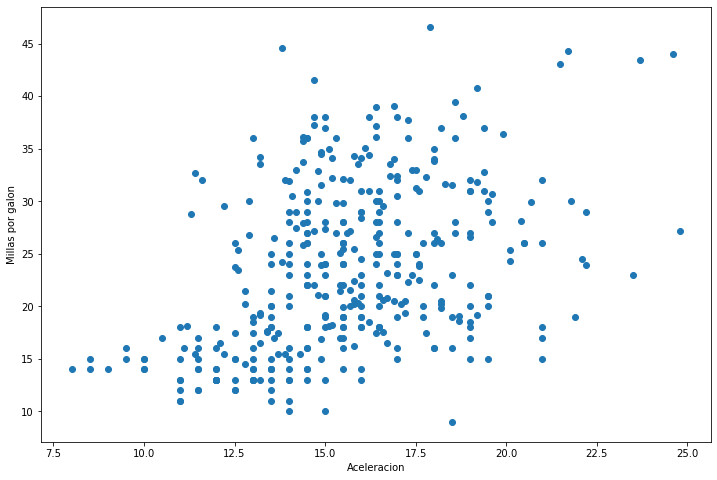

In [17]:
#Veamos algunos plots!
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Aceleracion')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

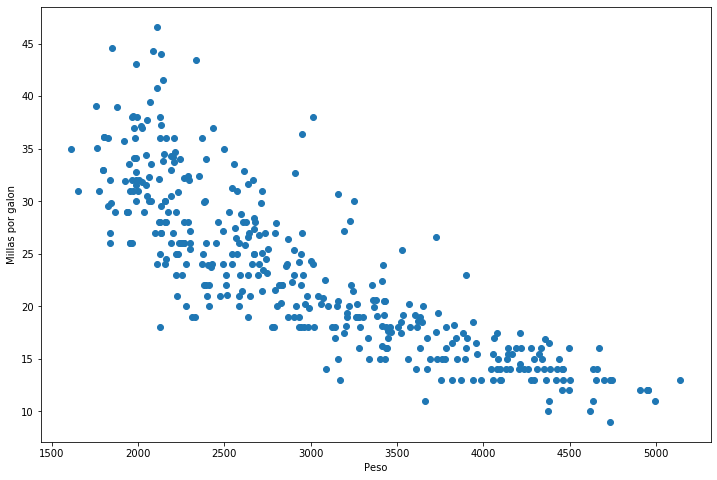

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Peso')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

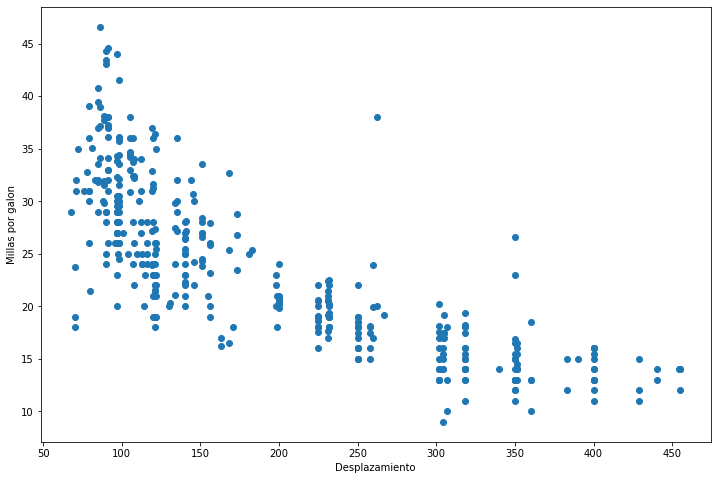

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Desplazamiento')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

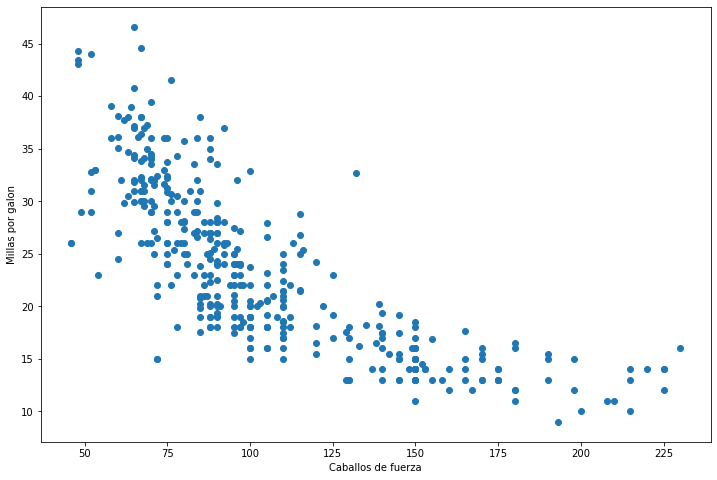

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Caballos de fuerza')
plt.ylabel('Millas por galon')

In [21]:
#Analisis de Correlaciones
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


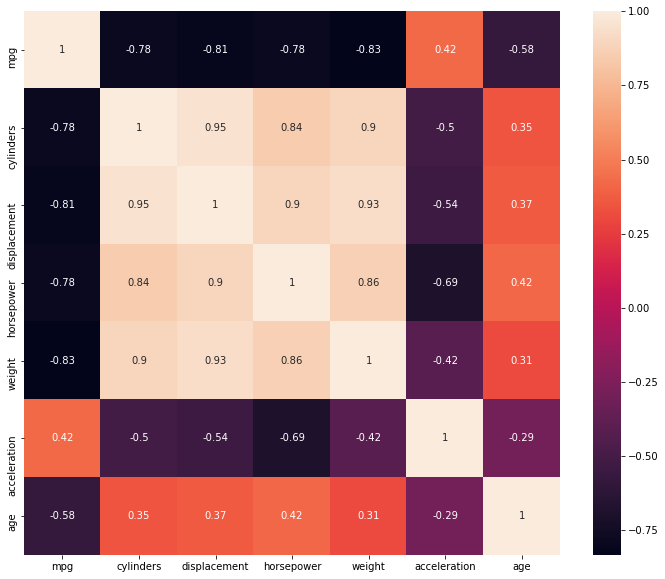

In [22]:
#Matriz de correlacion
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(automobile_corr, annot=True)

In [23]:
#Regresion Lineal
from sklearn.model_selection import train_test_split

X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

#Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [24]:
#Importamos, creamos y fiteamos el modelo
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [26]:
print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))

Puntaje Entrenamiento:  0.6127781599409752


In [28]:
#Realizamos las predicciones
y_pred = linear_model.predict(x_test)

In [29]:
from sklearn.metrics import r2_score

print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.5725985676331032


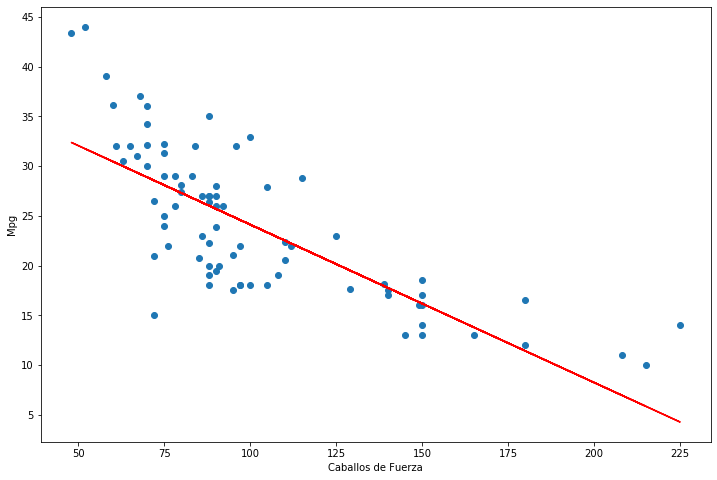

In [30]:
#Ploteamos 
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Caballos de Fuerza')
plt.ylabel('Mpg')
plt.show()

In [31]:
#Regresion lineal con age
X = automobile_df[['age']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

print('Puntaje de entrenamiento: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Puntaje de Testing: ', r2_score(y_test, y_pred))

Puntaje de entrenamiento:  0.3147449389754171
Puntaje de Testing:  0.38985433220997445


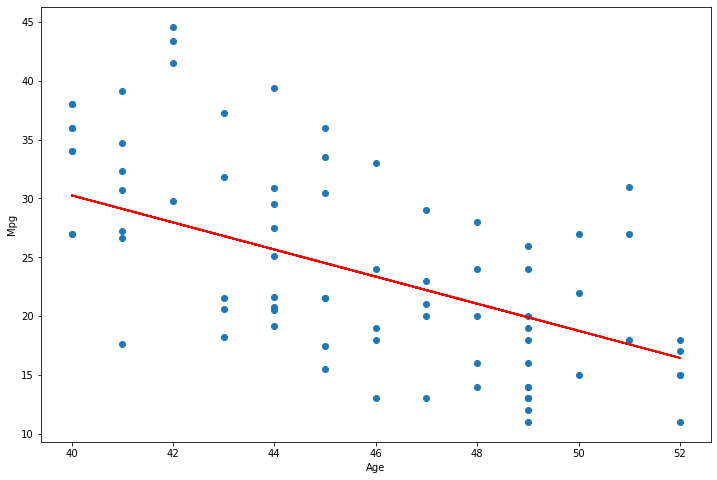

In [32]:
#Ploteamos 
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [33]:
#Regresion lineal con varias caracteristicas
X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
#Creamos el modelo
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [35]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.727987669318443


In [36]:
#Coeficientes
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

horsepower     -0.041979
weight         -0.005462
displacement   -0.004348
dtype: float64


In [37]:
#Realizamos las predicciones
y_pred = linear_model.predict(x_test)

In [38]:
print('Puntaje Testing', r2_score(y_test, y_pred))

Puntaje Testing 0.6169385121790827


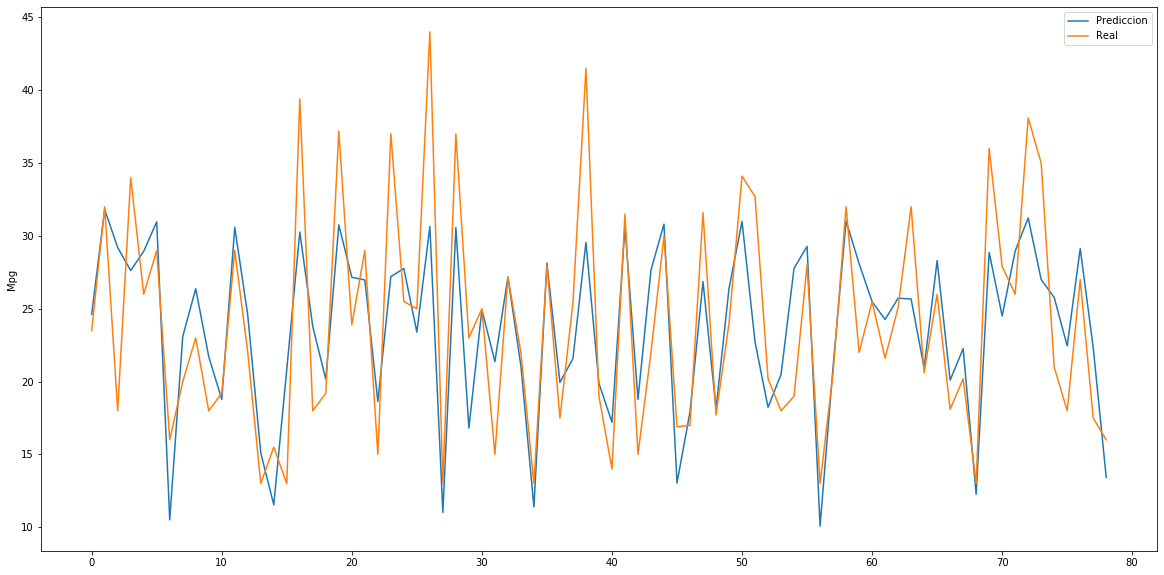

In [39]:
#Ploteamos
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

In [40]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.6438211343727462
Mean Squared Error: 22.338956459760123
Root Mean Squared Error: 4.7264105259446225
